In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# data ingestion

In [3]:
data = pd.read_csv("TSLA.CSV")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [5]:
# univariate analysis
stock_data = data[['Date','Close']]

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
stock_data['Date']=pd.to_datetime(stock_data.Date)

C:\Users\user\AppData\Local\Temp\ipykernel_23584\114328671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data.Date)


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
stock_data = stock_data.set_index('Date')

In [11]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [12]:
# eda

In [13]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


Text(0.5, 1.0, 'Tesla stock closing price')

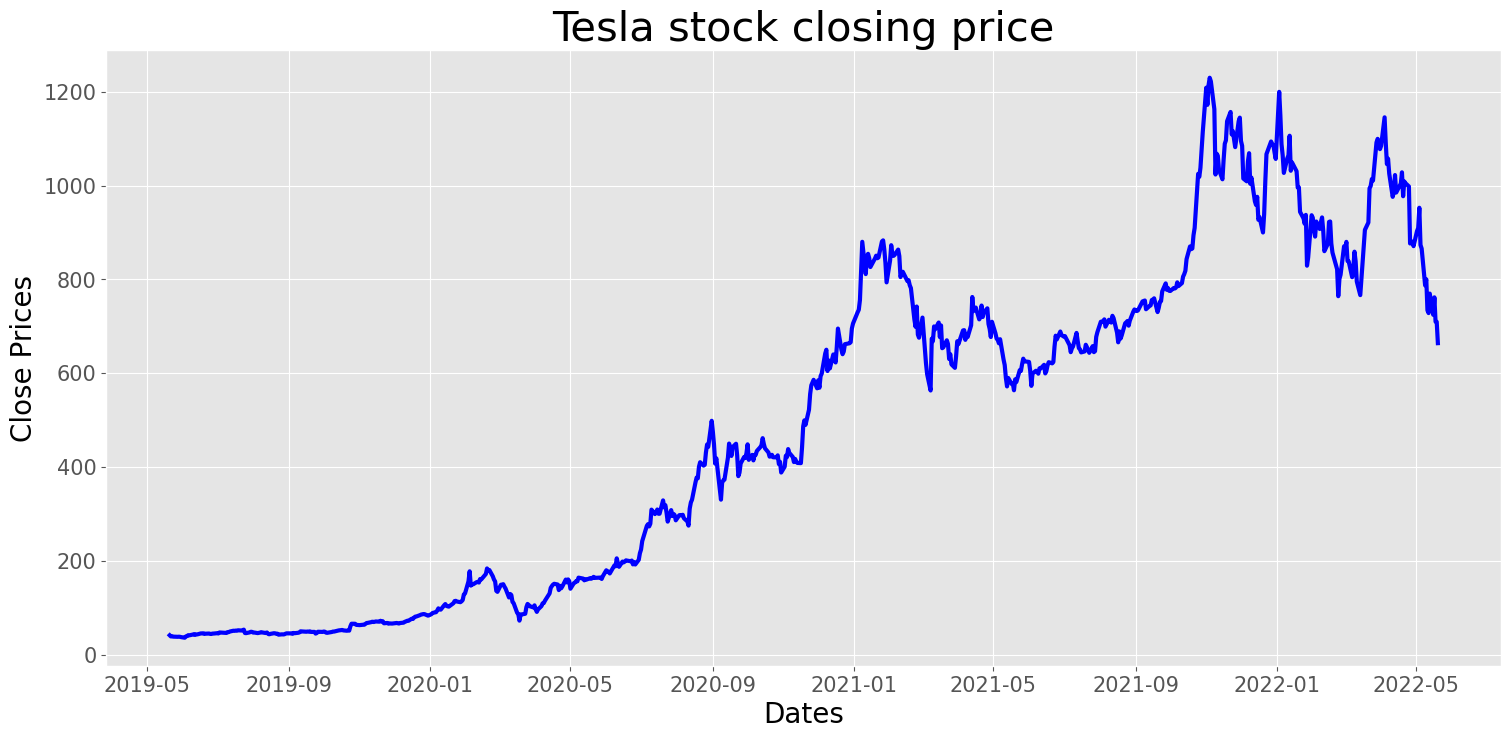

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates" , fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices" , fontsize = 20)
plt.yticks(fontsize=15)

plt.plot(stock_data.Close , linewidth =  3 , color = 'blue')
plt.title("Tesla stock closing price" , fontsize = 30)

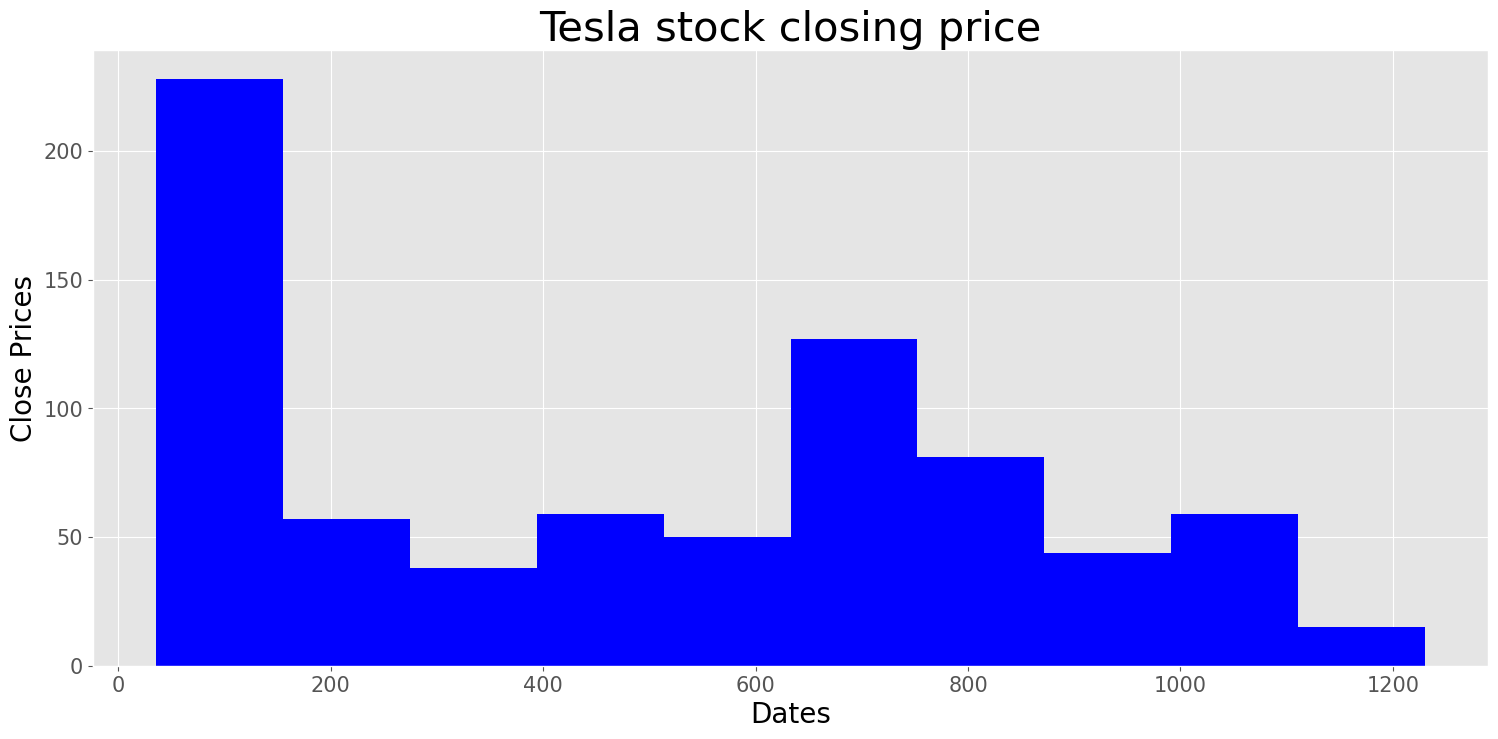

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates" , fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel("Close Prices" , fontsize = 20)
plt.yticks(fontsize=15)
plt.hist(stock_data.Close , linewidth = 3,color = 'blue')
plt.title("Tesla stock closing price" , fontsize = 30)
plt.show()

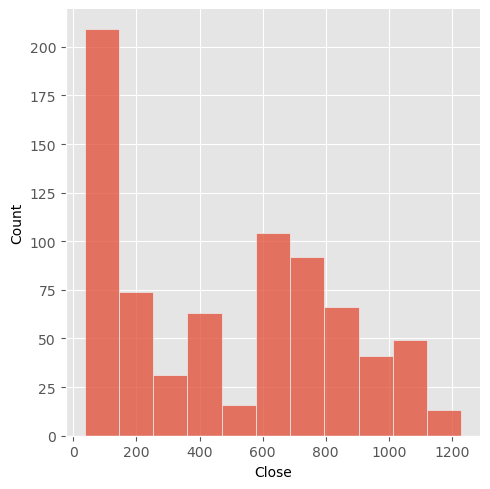

In [16]:
# distribution of the close price
import seaborn as sns
sns.displot(stock_data.Close)

In [17]:
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [18]:
rollmean = stock_data['Close'].rolling(120).mean()

In [19]:
rollstd = stock_data['Close'].rolling(120).std()

In [20]:
rollstd

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    108.003434
2022-05-17    108.569540
2022-05-18    109.828379
2022-05-19    111.364199
2022-05-20    112.993152
Name: Close, Length: 758, dtype: float64

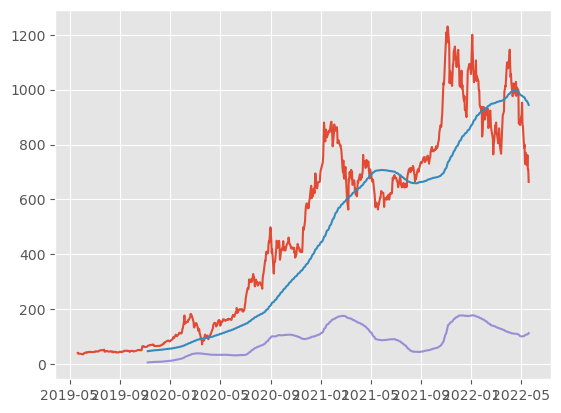

In [21]:
plt.plot(stock_data.Close)
plt.plot(rollmean)
plt.plot(rollstd)

In [22]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [23]:
pd.Series(adft[0:4],index = ["test stats" , "p value" , "lag value" , "data points"])

test stats      -1.363009
p value          0.599876
lag value        9.000000
data points    748.000000
dtype: float64

In [24]:
# if p value <0.05 reject null hypothese
# if p value > 0.05 accept the null hypothese
# null hypothesis is that the data is non - stationary

In [25]:
# if we have outliers?

<Axes: >

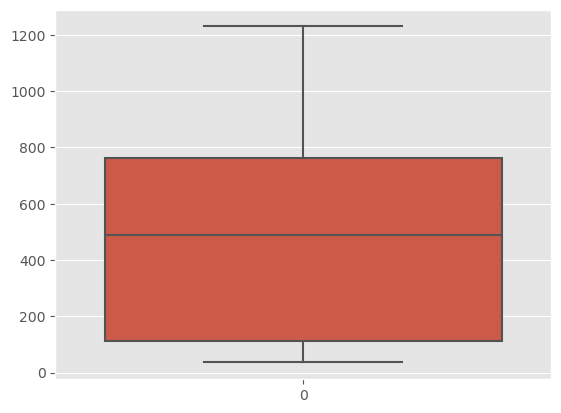

In [26]:
sns.boxplot(stock_data.Close)

In [27]:
# no outliers

In [28]:
# time series decomposition

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']],period = 12)

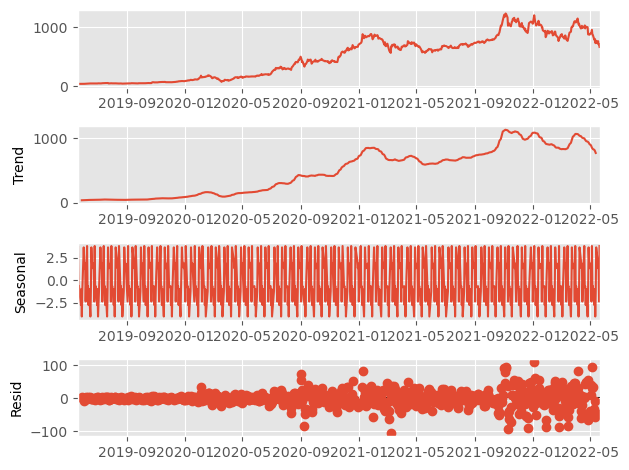

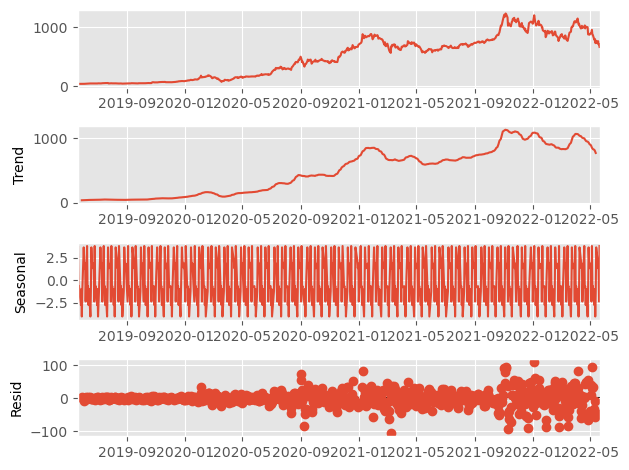

In [30]:
result.plot()

In [31]:
# 2 plot additive and multiplicative
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


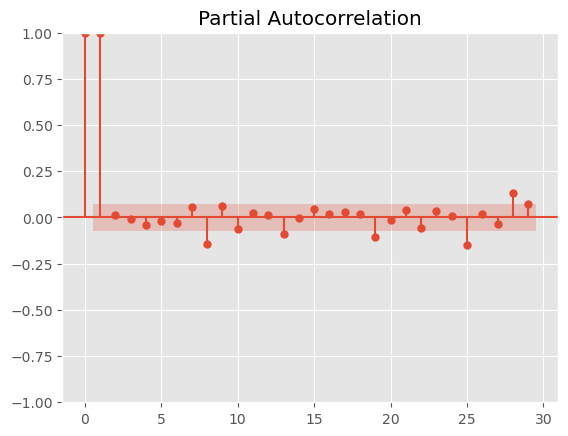

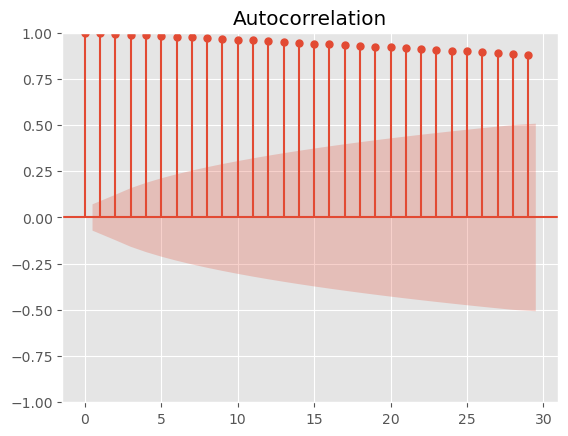

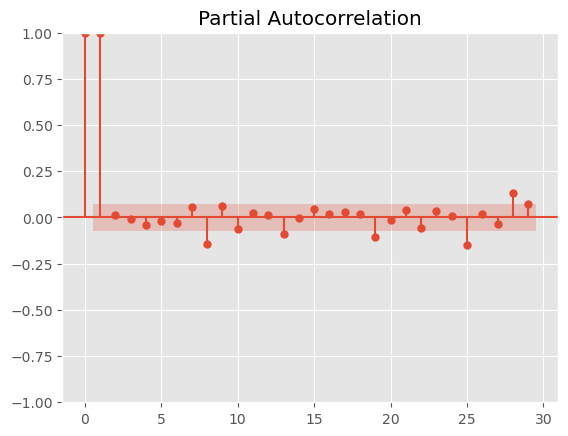

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [33]:
# preprocessing steps

In [34]:
# no missing value


In [35]:
# from non - stationary to stationary

In [36]:
df_close = stock_data['Close']

In [37]:
df_close = df_close.diff(1)

In [38]:
df_close = df_close.dropna()

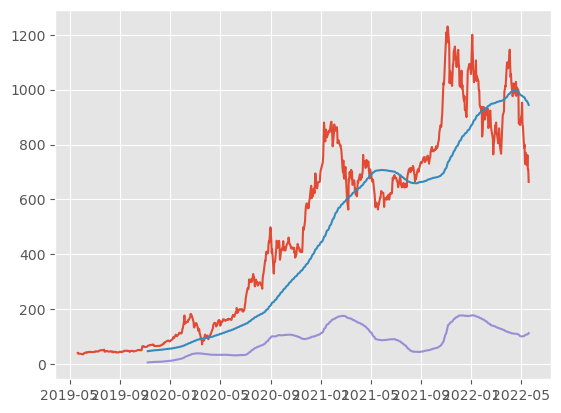

In [39]:
rollmean = stock_data['Close'].rolling(120).mean()
rollstd = stock_data['Close'].rolling(120).std()
plt.plot(stock_data.Close)
plt.plot(rollmean)
plt.plot(rollstd)

In [40]:
adft = adfuller(df_close)
pd.Series(adft[0:4],index = ["test stats" , "p value" , "lag value" , "data points"])

test stats    -8.324564e+00
p value        3.498786e-13
lag value      8.000000e+00
data points    7.480000e+02
dtype: float64

In [41]:
# we reject null hypothese

In [42]:
# stationary

In [49]:
training = df_close[0:60] #training

In [50]:
testing = df_close[60:] #testing

In [47]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [48]:
from sklearn.metrics import mean_squared_error

In [51]:
history = [x for x in training]

In [54]:
model = ARIMA(history, order = (1,1,1))

In [55]:
model = model.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -108.324
Date:                Wed, 17 Jul 2024   AIC                            222.648
Time:                        14:31:38   BIC                            228.880
Sample:                             0   HQIC                           225.081
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0919      0.217     -0.424      0.671      -0.517       0.333
ma.L1         -0.9692      0.132     -7.333      0.000      -1.228      -0.710
sigma2         2.1902      0.307      7.128      0.000       1.588       2.792
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               261.92
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                            -2.08
Prob(H) (two-sided):                  0.06   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# for forcasting
model.forecast()

array([0.00878143])

In [60]:
mean_squared_error([testing[0]],model.forecast())

0.7245741002275886

In [61]:
np.sqrt(mean_squared_error([testing[0]],model.forecast())) #rmse

0.851219184597944